<a href="https://colab.research.google.com/github/com0040/python_MechinLearning_and_DeepLearning_Basic/blob/main/20_%EB%8D%B0%EC%9D%B4%ED%84%B0_%ED%81%AC%EB%A1%A4%EB%A7%81%EC%9D%84_%ED%86%B5%ED%95%9C_%EC%82%BC%EC%84%B1%EC%A0%84%EC%9E%90_%EC%A3%BC%EC%8B%9D_%EA%B0%80%EA%B2%A9_%EC%98%88%EC%B8%A1%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import requests
from bs4 import BeautifulSoup
import time
import pandas as pd
from tqdm import tqdm

dic = {'User-Agent' : 'Mozilla/5.0 (Macintosh: intel Mac OS X 12_6)'}

total =[]

for n in tqdm(range(1,660)):

    url = requests.get('https://finance.naver.com/item/sise_day.naver?code=005930&page={}'.format(n), headers = dic)
    html = BeautifulSoup(url.text)

    table = html.find('table')
    table = pd.read_html(str(table))[0].dropna()
    del table['전일비']
    total.append(table)
    time.sleep(0.1)

100%|██████████| 659/659 [05:39<00:00,  1.94it/s]


In [11]:
len(total)

659

In [15]:
samsung = pd.concat(total,ignore_index = True) # ignore_index = True : 0번째로 시작하게 만든다다
samsung

,날짜,종가,시가,고가,저가,거래량
0,2022.10.24,57500.0,57000.0,57500.0,56700.0,16889654.0
1,2022.10.21,55900.0,55100.0,56300.0,55100.0,11456060.0
2,2022.10.20,55500.0,55200.0,56000.0,55100.0,17107653.0
3,2022.10.19,55800.0,56700.0,56900.0,55700.0,12660652.0
4,2022.10.18,56500.0,56700.0,57100.0,55800.0,14820702.0
...,...,...,...,...,...,...
6585,1996.07.22,75000.0,76100.0,77400.0,75000.0,178690.0
6586,1996.07.20,76700.0,75700.0,78600.0,74200.0,298780.0
6587,1996.07.19,74200.0,70000.0,74200.0,70000.0,179810.0
6588,1996.07.18,70000.0,69000.0,72000.0,68900.0,222710.0


In [16]:
samsung.info() # 날짜 X 문자

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6590 entries, 0 to 6589
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      6590 non-null   object 
 1   종가      6590 non-null   float64
 2   시가      6590 non-null   float64
 3   고가      6590 non-null   float64
 4   저가      6590 non-null   float64
 5   거래량     6590 non-null   float64
dtypes: float64(5), object(1)
memory usage: 309.0+ KB


In [17]:
samsung['날짜'] = pd.to_datetime(samsung['날짜'])
samsung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6590 entries, 0 to 6589
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      6590 non-null   datetime64[ns]
 1   종가      6590 non-null   float64       
 2   시가      6590 non-null   float64       
 3   고가      6590 non-null   float64       
 4   저가      6590 non-null   float64       
 5   거래량     6590 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 309.0 KB


In [18]:
samsung

,날짜,종가,시가,고가,저가,거래량
0,2022-10-24,57500.0,57000.0,57500.0,56700.0,16889654.0
1,2022-10-21,55900.0,55100.0,56300.0,55100.0,11456060.0
2,2022-10-20,55500.0,55200.0,56000.0,55100.0,17107653.0
3,2022-10-19,55800.0,56700.0,56900.0,55700.0,12660652.0
4,2022-10-18,56500.0,56700.0,57100.0,55800.0,14820702.0
...,...,...,...,...,...,...
6585,1996-07-22,75000.0,76100.0,77400.0,75000.0,178690.0
6586,1996-07-20,76700.0,75700.0,78600.0,74200.0,298780.0
6587,1996-07-19,74200.0,70000.0,74200.0,70000.0,179810.0
6588,1996-07-18,70000.0,69000.0,72000.0,68900.0,222710.0


In [19]:
samsung = samsung[::-1] # 과거에서 현재로 뒤집기
samsung

,날짜,종가,시가,고가,저가,거래량
6589,1996-07-16,68800.0,67000.0,69100.0,66500.0,55880.0
6588,1996-07-18,70000.0,69000.0,72000.0,68900.0,222710.0
6587,1996-07-19,74200.0,70000.0,74200.0,70000.0,179810.0
6586,1996-07-20,76700.0,75700.0,78600.0,74200.0,298780.0
6585,1996-07-22,75000.0,76100.0,77400.0,75000.0,178690.0
...,...,...,...,...,...,...
4,2022-10-18,56500.0,56700.0,57100.0,55800.0,14820702.0
3,2022-10-19,55800.0,56700.0,56900.0,55700.0,12660652.0
2,2022-10-20,55500.0,55200.0,56000.0,55100.0,17107653.0
1,2022-10-21,55900.0,55100.0,56300.0,55100.0,11456060.0


In [20]:
samsung.index = range(len(samsung)) # 인덱스 바로잡기 
samsung

,날짜,종가,시가,고가,저가,거래량
0,1996-07-16,68800.0,67000.0,69100.0,66500.0,55880.0
1,1996-07-18,70000.0,69000.0,72000.0,68900.0,222710.0
2,1996-07-19,74200.0,70000.0,74200.0,70000.0,179810.0
3,1996-07-20,76700.0,75700.0,78600.0,74200.0,298780.0
4,1996-07-22,75000.0,76100.0,77400.0,75000.0,178690.0
...,...,...,...,...,...,...
6585,2022-10-18,56500.0,56700.0,57100.0,55800.0,14820702.0
6586,2022-10-19,55800.0,56700.0,56900.0,55700.0,12660652.0
6587,2022-10-20,55500.0,55200.0,56000.0,55100.0,17107653.0
6588,2022-10-21,55900.0,55100.0,56300.0,55100.0,11456060.0


In [28]:
# 학습할 것과 정답을 알려줘야함
data = []
target = []

for i in range(len(samsung)-1): # 전날까지 해야 다음날 종가를 가져올 수 있다.
    a = list(samsung.iloc[i,1:]) # 문제집이 될 데이터
    b = samsung.iloc[i+1,1] # 다음날의 종가 = 정답
    data.append(a)
    target.append(b)

In [29]:
import numpy as np

data = np.array(data)
target = np.array(target)

In [30]:
data.shape

(6589, 5)

In [31]:
target.shape

(6589,)

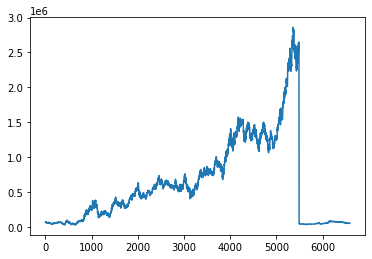

In [32]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

plt.plot(target) # 급감 X / 액면분할

In [33]:
rf = RandomForestRegressor() # 분할해서 랜덤하게 섞으면 그림을 못 그린다
rf.fit(data, target)

RandomForestRegressor()

In [37]:
a = list(samsung.iloc[-1][1:])
a

[57500.0, 57000.0, 57500.0, 56700.0, 16889654.0]

In [38]:
rf.predict([a]) # 내일 가격 예측 (22.10.25)

array([57363.])